You work at the oil extraction company OilyGiant. Your task is to find the best places to open 200 new oil wells.

To complete this task, you will have to perform the following steps:
 
- Read the files with the parameters collected from oil wells in the selected region: crude oil quality and reserve volume.
- Create a model to predict the volume of reserves in new wells.
- Choose the oil wells that have the highest estimated values.
- Choose the region with the highest total profit for the selected oil wells.
- You have data on crude oil samples from three regions. The parameters of each oil well in the region are already known. Create a model that helps choose the region with the highest profit margin. Analyze potential benefits and risks using the bootstrapping technique.

## Importing libraries

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import plotly_express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing datasets

In [ ]:
region1 = pd.read_csv('D:/Tripleten/datasets/geo_data_0.csv')
region2 = pd.read_csv('D:/Tripleten/datasets/geo_data_1.csv')
region3 = pd.read_csv('D:/Tripleten/datasets/geo_data_2.csv')

In [ ]:
databases = [region1,region2, region3]

for region in databases:
    print(region.info())

In [ ]:
for region in databases:
    print (region.head(2), end='\n\n')

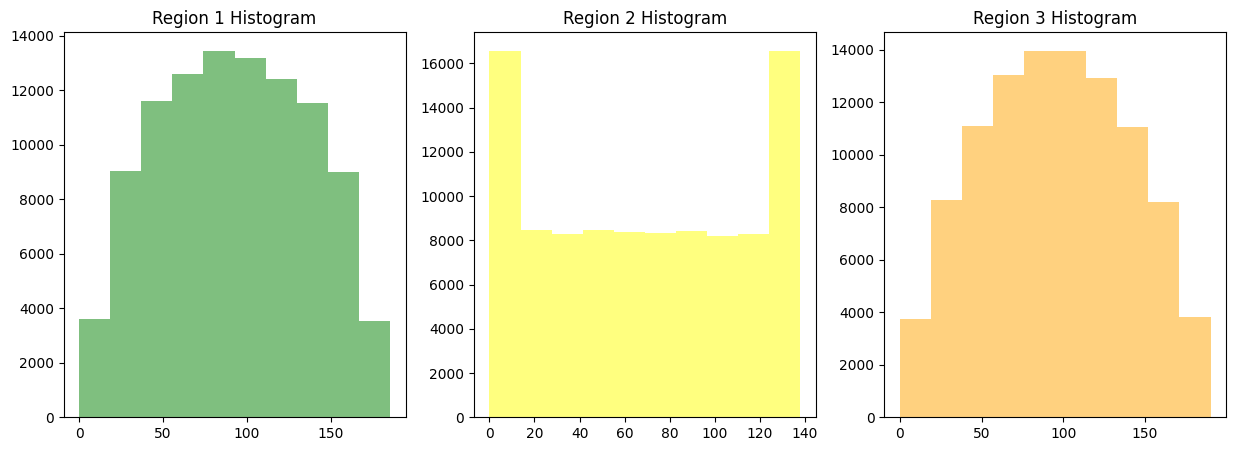

In [279]:
colors= ['green','yellow','orange']
fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i, region in enumerate(databases):
    row = 0
    col = i % 3 
    axs[col].hist(region['product'], color=colors[i], alpha=0.5)
    axs[col].set_title(f'Region {i+1} Histogram')

Region 1 and region 3 presents a normal distribution, however region 2 shows a bimodal distribution we may analyze in deep this skewed distribution.

In [305]:

for i, region in enumerate(databases):
	print(f'region {i+1}')
	print(f'unique values:{region['product'].nunique()}')
	print(f'shape of the column {region['product'].shape[0]}', end='\n\n')

region 1
unique values:100000
shape of the column 100000

region 2
unique values:12
shape of the column 100000

region 3
unique values:100000
shape of the column 100000



We found biased information in region 2, the values should be continuous not discrete, may be the distribution was rounded.

In [306]:
region2['product'].unique()

array([  3.17910258,  26.95326103, 134.76630516, 137.94540774,
        84.03888568, 110.99214671,  53.90652206,   0.        ,
       107.81304413,  57.08562465,  30.13236361,  80.85978309])

The distribution was not rounded, we are seeing some discrepancies with this dataset

In [ ]:
def plot_scatter_wells(real, predicted, region):
	'''Write documentation'''
	plt.figure(figsize=(10,5))
	plt.scatter(x=np.arange(0,25000), y=[real])
	plt.scatter(x=np.arange(0,25000), y=[predicted], alpha=0.3)
	plt.title(f'Value distribution for region {region}')
	plt.legend(['Validation Values', 'Predicted Values'])
	plt.show()

In [ ]:

def profit(product_predict, region):
	'''WRITE DOCUMENTATION'''
	investment = 100000000 # Also called budget
	wells = 200 #Quantity of wells to be produced with that investment
	cost_of_goods = investment/wells # The minimum production required.
	income_by_product = 4500 #Income generated by product unit
	minimum_production = cost_of_goods/income_by_product 

	top_200_wells = sorted(product_predict, reverse=True)[0:200]
		# print(top_200_wells)
	df_top_200_wells = pd.DataFrame(top_200_wells,columns=['pred_product'])
	df_top_200_wells['income'] = df_top_200_wells['pred_product'] * 4500 
	df_top_200_wells['gross_profit'] = df_top_200_wells['income'] - cost_of_goods
	potential_profit = df_top_200_wells['gross_profit'].sum()

	# print(f'Results of region {region}')

	print(f'Total predicted volume: {df_top_200_wells['pred_product'].sum():.2f}')
	if df_top_200_wells['income'].sum() < investment:
		print(f'We have potential losses of: {potential_profit:.2f}')
	else:
		print(f'We are expecting a potential profit of: {potential_profit:.2f}', end='\n\n')

	## USAR ROUND EN LUGAR DE 2F?
	# print(f'The maximum value obtained for the product was {df_top_200_wells['pred_product'].max()}')
	# print(f'The minimum value obtained for the product was {df_top_200_wells['pred_product'].min()}')
	# print(f'The minimum value to avoid losses is  {minimum_production:.2f}')
	


Not null values presented, we can proceed with the training model.

In [ ]:
def model_training( databases ):
    '''Write documentation'''
    for i, region in enumerate(databases,1):
        
        target = region['product']
        features = region[['f0','f1','f2']]

        x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1234)

        model = LinearRegression()
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        mse = mean_squared_error(y_test, y_predict)
        rmse = np.sqrt(mse)
        mean_reserved_volume = y_predict.mean()
        print(f'___________________________________')
        print(f'MODEL PREDICTION RESULTS FOR REGION {i}')
        print(f'RMSE: {rmse:.2f}')
        print(f'Mean Reserved Volume: {mean_reserved_volume:.2f}')
        profit(y_predict, i)
        plot_scatter_wells(y_test,y_predict,i)
        
model_training(databases)


## Finance

### Profit